# Linear Regression

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
df = pd.read_csv("height-weight.csv")

In [ ]:
df.head()

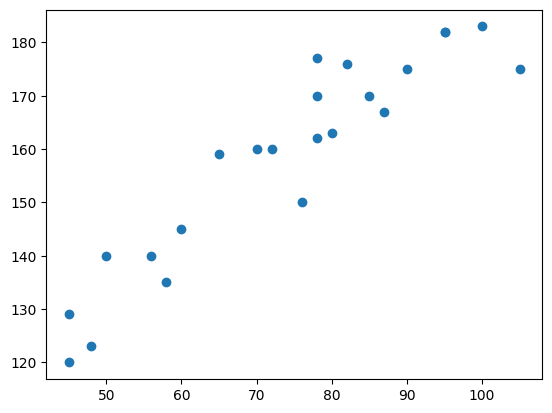

In [128]:
#Scatter Plotting
plt.scatter(df["Weight"],df["Height"])
plt.show()

In [129]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

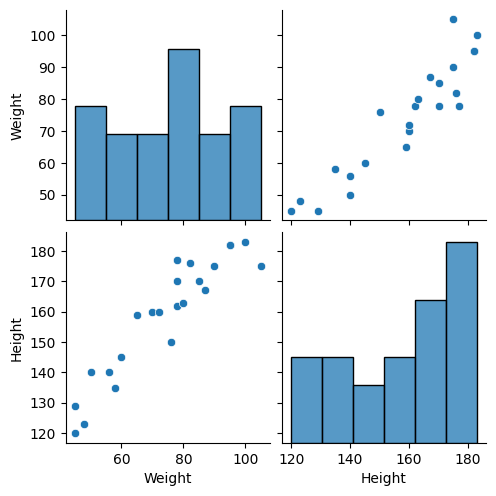

In [130]:
import seaborn as sns
sns.pairplot(df)

In [131]:
X = df["Weight"]
y = df["Height"]

In [132]:
np.array(X).shape

(23,)

In [133]:
np.array(y).shape

(23,)

In [134]:
X = df[["Weight"]]

In [135]:
y = df[["Height"]]

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [137]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [138]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [139]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [140]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(n_jobs=-1)

In [141]:
lin_reg.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [142]:
print("Coefficient or slope:",lin_reg.coef_)
print("Intercept:",lin_reg.intercept_)

Coefficient or slope: [[17.03440872]]
Intercept: [157.5]


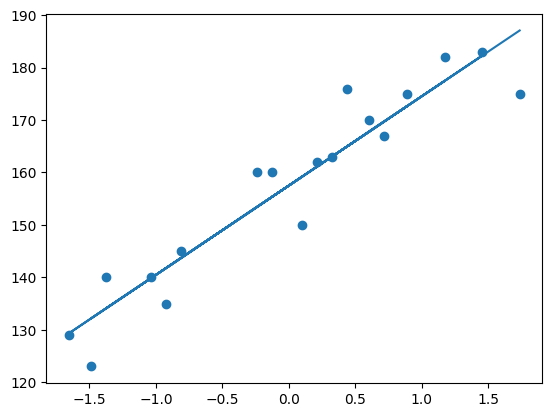

In [143]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lin_reg.predict(X_train))

In [144]:
#Test Data Predict
y_pred = lin_reg.predict(X_test)

In [145]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [146]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.776986986042344


In [147]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252